In [ ]:
pip install plotly

In [ ]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Import Dataset

In [ ]:
path = kagglehub.dataset_download("damirdizdarevic/uefa-euro-2024-players")
files = os.listdir(path)
print(files)

['euro2024_players.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, 'euro2024_players.csv'))

# Dataset Exploration

In [ ]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [ ]:
df.tail(1)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
622,Tomas Chory,Centre-Forward,29,FC Viktoria Plzen,199,right,3,2,3200000,Czech Republic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [ ]:
df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


## Checking:

In [ ]:
# Missing values
df.isnull().sum()

,0
Name,0
Position,0
Age,0
Club,0
Height,0
Foot,3
Caps,0
Goals,0
MarketValue,0
Country,0


In [ ]:
# Duplicate values
df.duplicated().sum()

np.int64(0)

Since the `Foot` feature is not included in our analysis, we retained its missing values to avoid unnecessary data loss.

# Univariate Analysis / Player Demographics

## Position Frequency

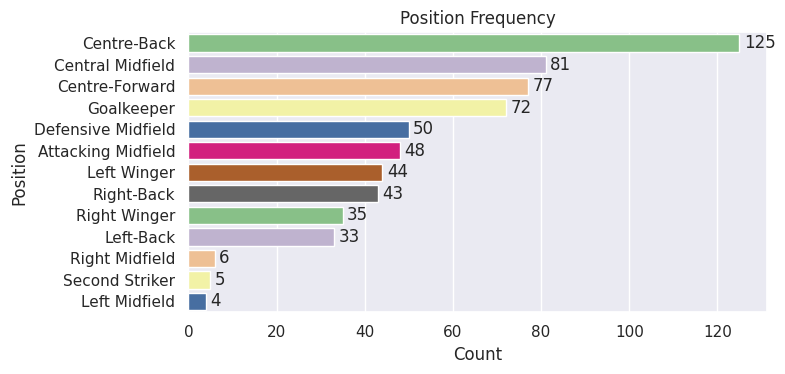

In [ ]:
value_counts = df['Position'].value_counts().reset_index()
value_counts.columns = ['Position', 'Count']

plt.figure(figsize=(8, len(value_counts) * 0.3))
ax = sns.barplot(
    data=value_counts,
    x='Count',
    y='Position',
    hue='Position',
    dodge=False,
    palette='Accent',
    legend=False
)

for i, v in enumerate(value_counts['Count']):
    ax.text(v + 1, i, str(v), va='center')

plt.title('Position Frequency')
plt.xlabel('Count')
plt.ylabel('Position')
plt.tight_layout()
plt.show()

**The most common position in UEFA Euro 2024 is Centre-Back.**

It does make sense because in modern football, a centre back is a versatile player. They are not just a defender, they are also responsible to breaking lines with passes and provide frequent movements.

Ref.: https://learning.coachesvoice.com/cv/modern-centre-back-football-tactics-explained-van-dijk-ramos-dias-bonucci/

## Age Distribution

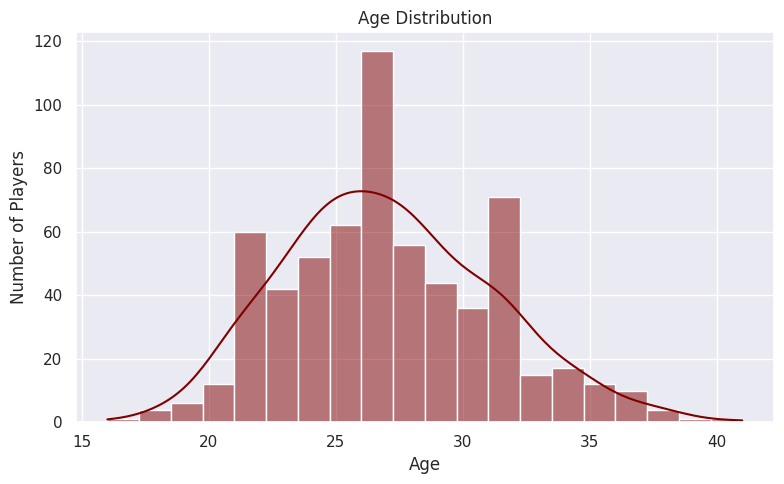

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='maroon')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()

The most common age group is around 26 years old. It suggest that mid-20 is the prime age range for football player at this level.

The young players under-20 is very rare, but present. Also, a few old players ages at 35+ are still playing.

In [ ]:
# Youngest
youngest_age = df['Age'].min()
youngest_players = df[df['Age'] == youngest_age][['Name', 'Country', 'Club', 'Age']]

# Oldest
oldest_age = df['Age'].max()
oldest_players = df[df['Age'] == oldest_age][['Name', 'Country', 'Club', 'Age']]

print("Youngest Player(s):")
print(youngest_players)

print("\n Oldest Player(s):")
print(oldest_players)

Youngest Player(s):
             Name Country          Club  Age
126  Lamine Yamal   Spain  FC Barcelona   16

 Oldest Player(s):
     Name   Country      Club  Age
577  Pepe  Portugal  FC Porto   41


## Height Distribution

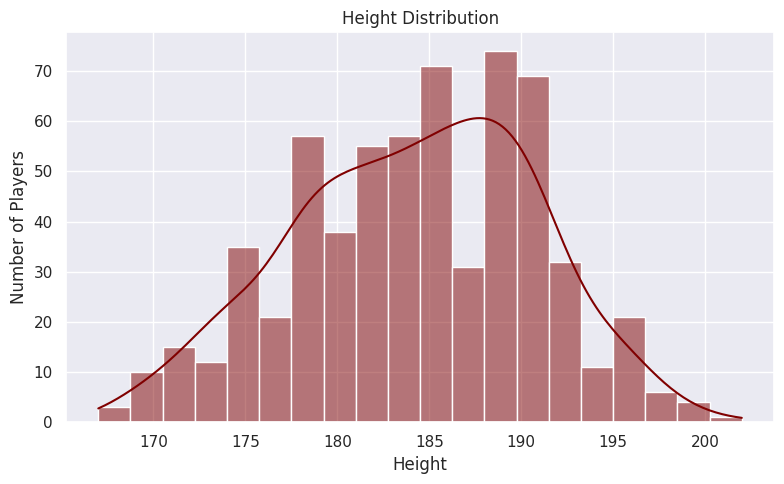

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Height'], bins=20, kde=True, color='maroon')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 tallest players
top_height = df.sort_values('Height', ascending=False).head(10)
top_height

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
288,Vanja Milinković-Savić,Goalkeeper,27,Torino FC,202,right,19,0,5000000,Serbia
493,Anatoliy Trubin,Goalkeeper,22,SL Benfica,199,right,11,0,25000000,Ukraine
622,Tomas Chory,Centre-Forward,29,FC Viktoria Plzen,199,right,3,2,3200000,Czech Republic
312,Marcin Bulka,Goalkeeper,24,OGC Nice,199,right,1,0,20000000,Poland
265,Jannik Vestergaard,Centre-Back,31,Leicester City,199,both,40,2,3000000,Denmark
519,Altay Bayındır,Goalkeeper,26,Manchester United,198,right,9,0,10000000,Turkiye
547,Giorgi Loria,Goalkeeper,38,Dinamo Tbilisi,197,right,77,0,50000,Georgia
545,Giorgi Mamardashvili,Goalkeeper,23,Valencia CF,197,left,16,0,35000000,Georgia
467,Ștefan Târnovanu,Goalkeeper,24,FCSB,197,right,1,0,3000000,Romania
417,Koen Casteels,Goalkeeper,31,VfL Wolfsburg,197,left,9,0,6000000,Belgium


* The highest concentration of players falls between 180 cm - 190 cm
* A few players are over 195 cm, likely a goalkeeper or very tall defenders
* Position may influence height, attackers and midfielders can vary more, while defenders and keepers tend to be taller
* Among the top 10 tallest player, there are 8 goalkeeper

# Bivariate Analysis

## Age & Performance

### a scatter plot: Age vs Caps

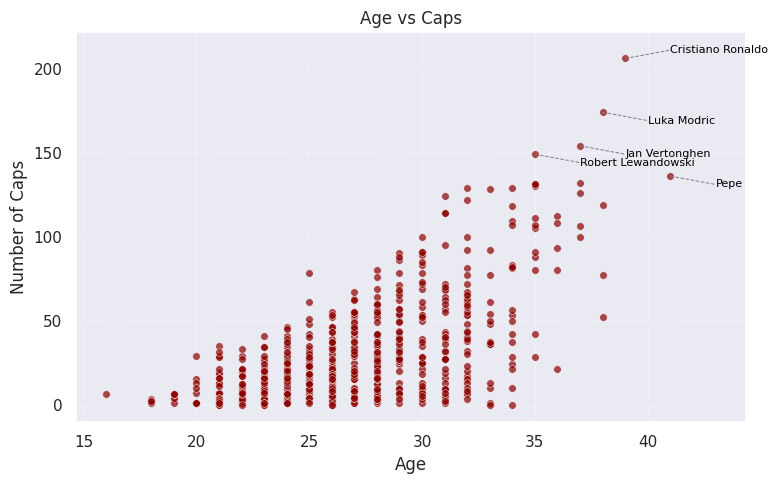

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Caps', color='darkred', s=30, alpha=0.7)

# Top 5 players with most goals
top_caps = df.sort_values('Caps', ascending=False).head(5)

# Apply staggered offsets
for i, row in top_caps.iterrows():
    x_point = row['Age']
    y_point = row['Caps']
    x_text = x_point + 2

    offset = 5 if i % 2 == 0 else -5
    y_text = y_point + offset

    plt.plot([x_point, x_text], [y_point, y_text], color='gray', linestyle='--', linewidth=0.7)

    plt.text(x_text, y_text, row['Name'], fontsize=8, va='center', ha='left', color='black')

plt.title('Age vs Caps')
plt.xlabel('Age')
plt.ylabel('Number of Caps')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

* Older players generally have more caps
* The spread in the mid-20s shows not all young (prime) players get regular caps
* Ronaldo, Modric, Vertonghen, Lewandowski, and Pepe are the long-serving players who have been consistently selected for the national team

### a scatter plot: Age vs Goals

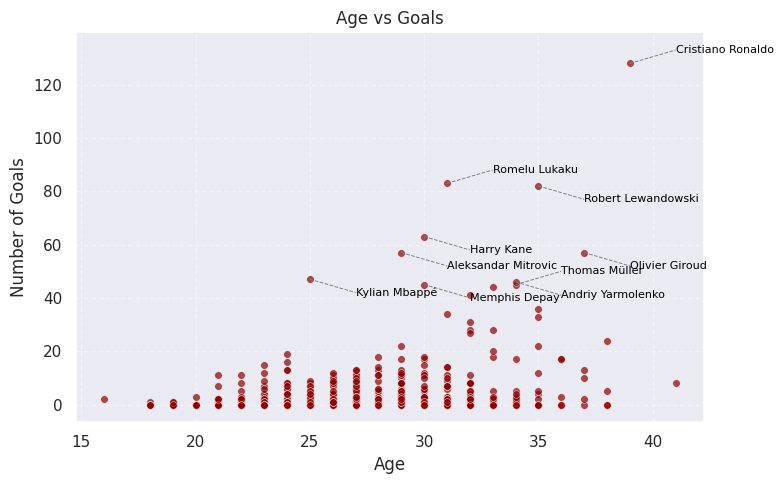

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Goals', color='darkred', s=30, alpha=0.7)

# Top 10 players with most goals
top_goal_scorers = df.sort_values('Goals', ascending=False).head(10)

# Apply staggered offsets
for i, row in top_goal_scorers.iterrows():
    x_point = row['Age']
    y_point = row['Goals']
    x_text = x_point + 2

    offset = 5 if i % 2 == 0 else -5
    y_text = y_point + offset

    plt.plot([x_point, x_text], [y_point, y_text], color='gray', linestyle='--', linewidth=0.7)

    plt.text(x_text, y_text, row['Name'], fontsize=8, va='center', ha='left', color='black')

plt.title('Age vs Goals')
plt.xlabel('Age')
plt.ylabel('Number of Goals')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 tallest players
top_goals = df.sort_values('Goals', ascending=False).head(10)
top_goals

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
596,Cristiano Ronaldo,Centre-Forward,39,Al-Nassr FC,188,right,206,128,15000000,Portugal
440,Romelu Lukaku,Centre-Forward,31,AS Roma,191,left,114,83,30000000,Belgium
335,Robert Lewandowski,Centre-Forward,35,FC Barcelona,185,right,149,82,15000000,Poland
257,Harry Kane,Centre-Forward,30,Bayern Munich,188,right,91,63,100000000,England
309,Aleksandar Mitrovic,Centre-Forward,29,Al-Hilal SFC,189,right,90,57,28000000,Serbia
415,Olivier Giroud,Centre-Forward,37,AC Milan,192,left,132,57,3000000,France
411,Kylian Mbappé,Centre-Forward,25,Paris Saint-Germain,178,right,78,47,180000000,France
515,Andriy Yarmolenko,Right Winger,34,Dynamo Kyiv,189,left,118,46,2000000,Ukraine
363,Memphis Depay,Centre-Forward,30,Atlético de Madrid,178,right,91,45,10000000,Netherlands
22,Thomas Müller,Second Striker,34,Bayern Munich,185,right,129,45,8000000,Germany


* Most players, especially players under 28, have fewer than 20 goals. This indicate that scoring many goals internationally is rare and often limited to elite players
* Age correlates moderately with goals, but when we go deeper, it is not just about age, position really matter. Among the top 10 goal scorers, 8 of them is centre-forward (or a striker)

Ref: https://www.ssl-nc.com/soccer-positions

## Height & Position

In [ ]:
fig = px.box(
    df,
    x='Position',
    y='Height',
    color='Position',
    points='all',  # show all data points
    title='Player Height Distribution by Position'
)

fig.update_layout(showlegend=False)
fig.show()

* Goalkeeper cleary the tallest player, with most of the players are over 190 cm
* Centre-back and centre-forward show high median heights, ideal for physical battles
* Height is position dependent, each role has its own physical profile based on tactical demands

## Age & Market Value

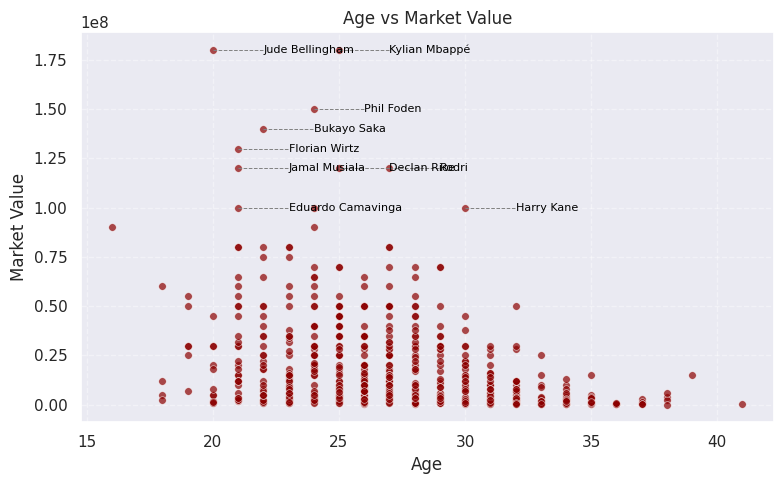

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='MarketValue', color='darkred', s=30, alpha=0.7)

# Top 10 players with most goals
top_marketvalue = df.sort_values('MarketValue', ascending=False).head(10)

# Apply staggered offsets
for i, row in top_marketvalue.iterrows():
    x_point = row['Age']
    y_point = row['MarketValue']
    x_text = x_point + 2

    offset = 5 if i % 2 == 0 else -5
    y_text = y_point + offset

    plt.plot([x_point, x_text], [y_point, y_text], color='gray', linestyle='--', linewidth=0.7)

    plt.text(x_text, y_text, row['Name'], fontsize=8, va='center', ha='left', color='black')

plt.title('Age vs Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Younger players tend to have higher market values, with value generally declining as age increases.

# Clubs

## Top 10 Clubs with the Most Participating Players

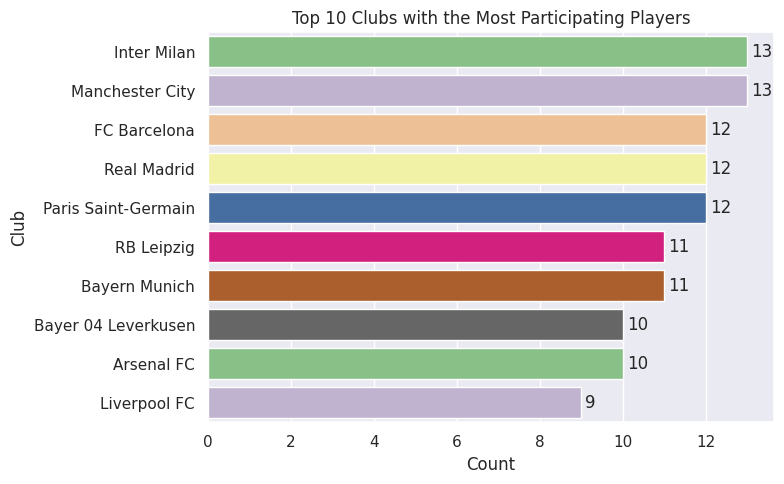

In [ ]:
value_counts = df['Club'].value_counts().head(10).reset_index()
value_counts.columns = ['Club', 'Count']

plt.figure(figsize=(8, len(value_counts) * 0.5))
ax = sns.barplot(
    data=value_counts,
    x='Count',
    y='Club',
    hue='Club',
    dodge=False,
    palette='Accent',
    legend=False
)

for i, v in enumerate(value_counts['Count']):
    ax.text(v + 0.1, i, str(v), va='center')

plt.title('Top 10 Clubs with the Most Participating Players')
plt.xlabel('Count')
plt.ylabel('Club')
plt.tight_layout()
plt.show()

##  Club Diversity: Top 10 Clubs with the Most Nationalities

In [ ]:
# Count unique nationalities per club
club_nationality = df.groupby('Club')['Country'].nunique().sort_values(ascending=False)

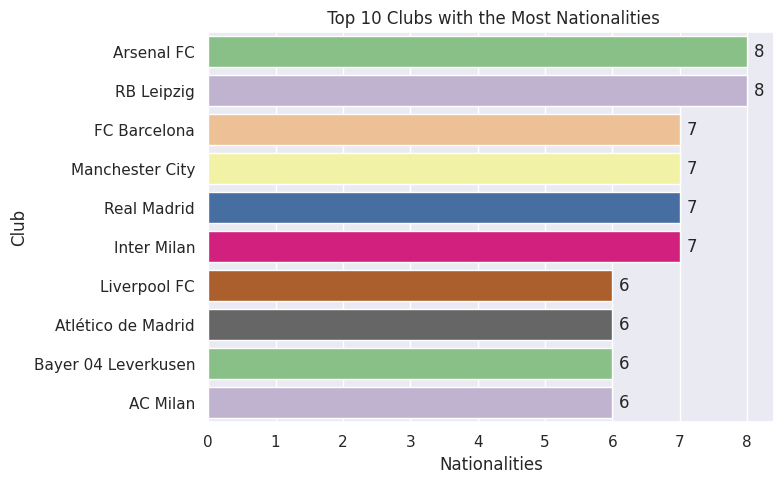

In [ ]:
top_club_diversity = club_nationality.head(10).reset_index()
top_club_diversity.columns = ['Club', 'Nationalities']

plt.figure(figsize=(8, len(value_counts) * 0.5))
ax = sns.barplot(
    data=top_club_diversity,
    x='Nationalities',
    y='Club',
    hue='Club',
    dodge=False,
    palette='Accent',
    legend=False
)

for i, v in enumerate(top_club_diversity['Nationalities']):
    ax.text(v + 0.1, i, str(v), va='center')

plt.title(' Top 10 Clubs with the Most Nationalities')
plt.xlabel('Nationalities')
plt.ylabel('Club')
plt.tight_layout()
plt.show()

# Correlation Map (for numeric columns)

In [ ]:
numeric_columns = df.select_dtypes(include=np.number)
correlation = numeric_columns.corr()

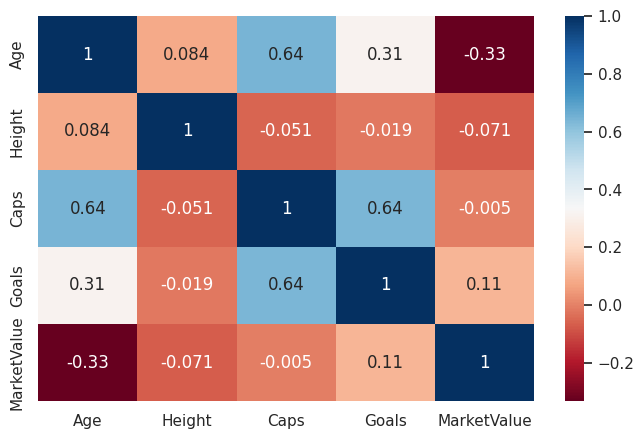

In [ ]:
sns.set(rc={'figure.figsize': (8, 5)})
sns.heatmap(correlation, cmap="RdBu", annot=True)
plt.show()

The correlation map shows that most of the feature do not have strong correlation. The correlation that more stand out are Goals vs Caps, Goals vs Age, and Caps vs Age, with correlation values 0.64.

This indicates that players who are older or have more appearances tend to score more goals.